# Basic Option Chain Analysis
I have collected data from various expiration dates and different trading days for the Option Chain. I will be conducting a basic data analysis to understand how the premiums of options are affected.

# Loading The Data Set

In [43]:
import pandas as pd
import numpy as np

In [44]:
data = pd.read_csv("OptionChainData.csv")

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Symbol                              640 non-null    object 
 1   Date                                640 non-null    object 
 2   Expiry                              640 non-null    object 
 3   Option type                         640 non-null    object 
 4   Strike Price                        640 non-null    int64  
 5   Open                                640 non-null    object 
 6   High                                640 non-null    object 
 7   Low                                 640 non-null    object 
 8   Close                               640 non-null    float64
 9   LTP                                 640 non-null    object 
 10  Settle Price                        640 non-null    float64
 11  No. of contracts                    640 non-n

In [46]:
data

,Symbol,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover * in ??? Lakhs,Premium Turnover ** in ??? Lakhs,Open Int,Change in OI,Underlying Value,ITM/OTM,Period For Expiry,Difference bw Strike and Nifty
0,NIFTY,08-Sep-23,12-Oct-23,PE,19650,-,-,-,281.45,-,240.95,-,-,-,-,-,19819.95,OTM,34,169.95
1,NIFTY,11-Sep-23,12-Oct-23,PE,19650,-,-,-,281.45,-,171.65,-,-,-,-,-,19996.35,OTM,31,346.35
2,NIFTY,12-Sep-23,12-Oct-23,PE,19650,-,-,-,281.45,-,168.45,-,-,-,-,-,19993.20,OTM,30,343.20
3,NIFTY,13-Sep-23,12-Oct-23,PE,19650,-,-,-,281.45,-,142.55,-,-,-,-,-,20070.00,OTM,29,420.00
4,NIFTY,14-Sep-23,12-Oct-23,PE,19650,-,-,-,281.45,-,130.35,-,-,-,-,-,20103.10,OTM,28,453.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,NIFTY,14-Sep-23,21-Sep-23,PE,19450,10,10.75,5.25,6.20,6.25,6.20,58513,569248.21,209.28,749750,520200,20103.10,OTM,7,653.10
636,NIFTY,15-Sep-23,21-Sep-23,PE,19450,5,5.55,4.25,4.55,4.45,4.55,125534,1221118.69,300.54,647100,-102650,20192.35,OTM,6,742.35
637,NIFTY,18-Sep-23,21-Sep-23,PE,19450,4.45,4.45,2.05,2.40,2.25,2.40,90966,884783.83,139.48,611800,-35300,20133.30,OTM,3,683.30
638,NIFTY,20-Sep-23,21-Sep-23,PE,19450,2.25,3.55,0.65,0.95,0.7,0.95,247641,2408522.26,213.53,1140400,528600,19901.40,OTM,1,451.40


# Data Cleaning

In [47]:
final_data = data.loc[:, ["Option type  ", "Strike Price  ", "LTP  ","Underlying Value  ", "Period For Expiry", "Difference bw Strike and Nifty", "ITM/OTM"]]

In [48]:
final_data.columns = ["Option", "Strike", "Premium", "Nifty", "Period", "Difference", "ITM/OTM"]

In [49]:
final_data = final_data[final_data["Premium"] != '-']

In [50]:
final_data

,Option,Strike,Premium,Nifty,Period,Difference,ITM/OTM
8,PE,19650,109.75,19742.35,21,92.35,OTM
9,PE,19650,129.1,19674.25,20,24.25,OTM
10,PE,19650,111.55,19674.55,17,24.55,OTM
11,PE,19650,119.85,19664.70,16,14.70,OTM
12,PE,19650,97.85,19716.45,15,66.45,OTM
...,...,...,...,...,...,...,...
635,PE,19450,6.25,20103.10,7,653.10,OTM
636,PE,19450,4.45,20192.35,6,742.35,OTM
637,PE,19450,2.25,20133.30,3,683.30,OTM
638,PE,19450,0.7,19901.40,1,451.40,OTM


In [51]:
final_data["Premium"] = final_data["Premium"].astype(float)

In [52]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 8 to 639
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Option      564 non-null    object 
 1   Strike      564 non-null    int64  
 2   Premium     564 non-null    float64
 3   Nifty       564 non-null    float64
 4   Period      564 non-null    int64  
 5   Difference  564 non-null    float64
 6   ITM/OTM     564 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 35.2+ KB


### Description of Column Headers:
Option: Specifies whether it's a Call option (CE) or Put Option (PE).  
Strike: Indicates the Strike Price of the option.  
Premium: Represents the Last Traded Premium (LTP) of the option.  
Nifty: Denotes the Price of the underlying asset.  
Period: Shows the Remaining Time until the option's expiration in days.  
Difference: Reflects the Absolute Difference between the Strike Price and the Nifty price.  
ITM/OTM: Indicates whether the Option is In The Money (ITM) or Out of The Money (OTM).

# Data Analysis 

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

## 3D Scatter Plot

In [54]:
import plotly.express as px 
  
fig = px.scatter_3d(final_data, x = 'Difference',  
                    y = 'Period',  
                    z = 'Premium', 
                    color = 'ITM/OTM') 
  
fig.show()

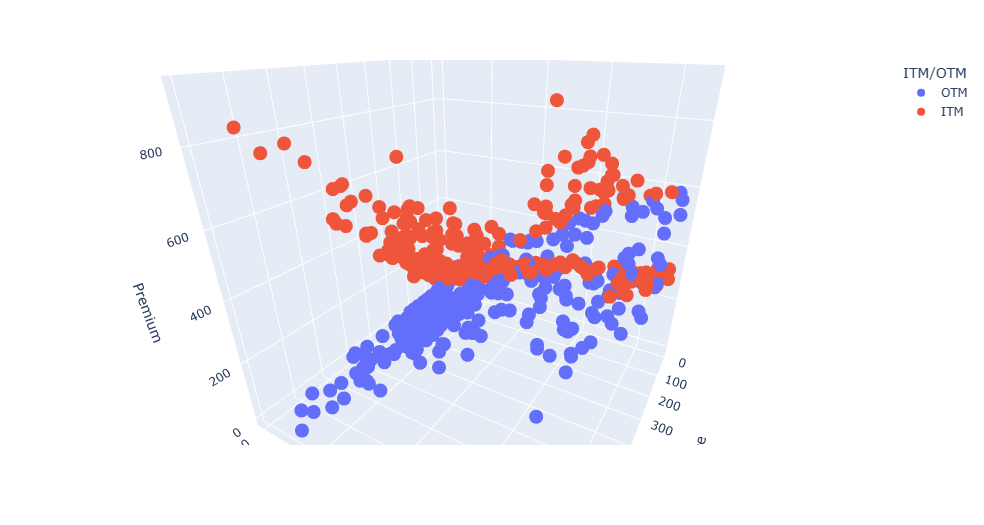

### Insight
The 3D chart above indicates a strong correlation between the option premium and two key factors: the remaining period until expiry and the difference between the Strike Price and the current value of Nifty. Notably, it becomes evident that for the same difference and the same remaining period, In The Money (ITM) options command higher premiums compared to Out of The Money (OTM) options. This observation is expected, as ITM options include Intrinsic Value (IV) in addition to Time Value (TV), whereas OTM options solely consist of Time Value.

In [55]:
final_data["Option-ITM/OTM"] = final_data["Option"] + "-" + final_data["ITM/OTM"]

In [56]:
final_data

,Option,Strike,Premium,Nifty,Period,Difference,ITM/OTM,Option-ITM/OTM
8,PE,19650,109.75,19742.35,21,92.35,OTM,PE-OTM
9,PE,19650,129.10,19674.25,20,24.25,OTM,PE-OTM
10,PE,19650,111.55,19674.55,17,24.55,OTM,PE-OTM
11,PE,19650,119.85,19664.70,16,14.70,OTM,PE-OTM
12,PE,19650,97.85,19716.45,15,66.45,OTM,PE-OTM
...,...,...,...,...,...,...,...,...
635,PE,19450,6.25,20103.10,7,653.10,OTM,PE-OTM
636,PE,19450,4.45,20192.35,6,742.35,OTM,PE-OTM
637,PE,19450,2.25,20133.30,3,683.30,OTM,PE-OTM
638,PE,19450,0.70,19901.40,1,451.40,OTM,PE-OTM


In [57]:
import plotly.express as px 
  
fig = px.scatter_3d(final_data, x = 'Difference',  
                    y = 'Period',  
                    z = 'Premium', 
                    color = 'Option-ITM/OTM') 
  
fig.show()


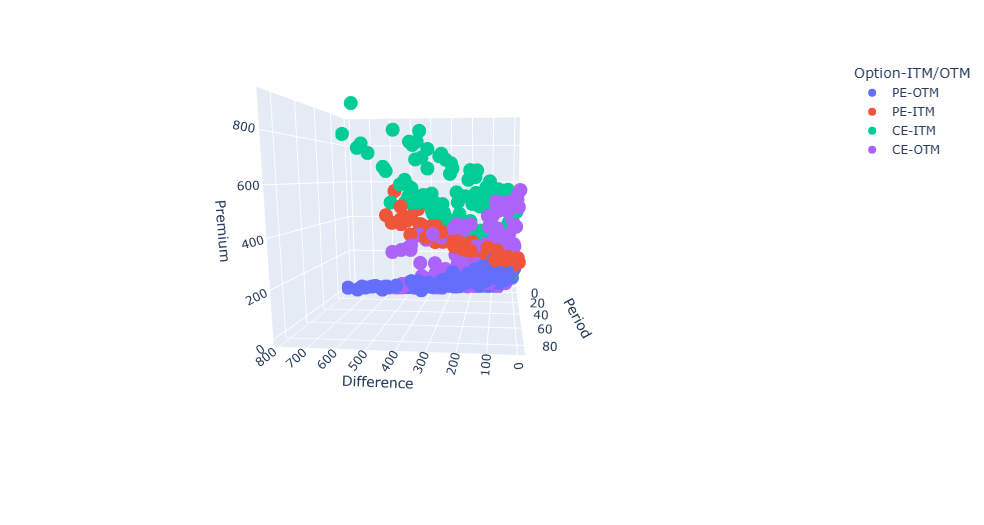

### Insight:

1. **OTM Options:** When the difference decreases, the premium tends to increase.

2. **ITM Options:** Conversely, an increase in the difference leads to a higher premium for ITM options.

3. **Comparing ITM Options:**
   - ITM Call Options (CE) are priced higher than both OTM Call Options and ITM Put Options (PE).
   - Both OTM Call Options and ITM Put Options are priced above OTM Put Options.

4. **Unique Scenario:**
   - Interestingly, in the case of comparing OTM Call Options and ITM Put Options, the premium of ITM Put Options can surpass that of OTM Call Options when there's a substantial difference between the Strike and Nifty prices.


In [58]:
import plotly.express as px 
  
fig = px.scatter_3d(final_data, x = 'Difference',  
                    y = 'Period',  
                    z = 'Premium', 
                    color = 'Option-ITM/OTM') 
  
fig.show()

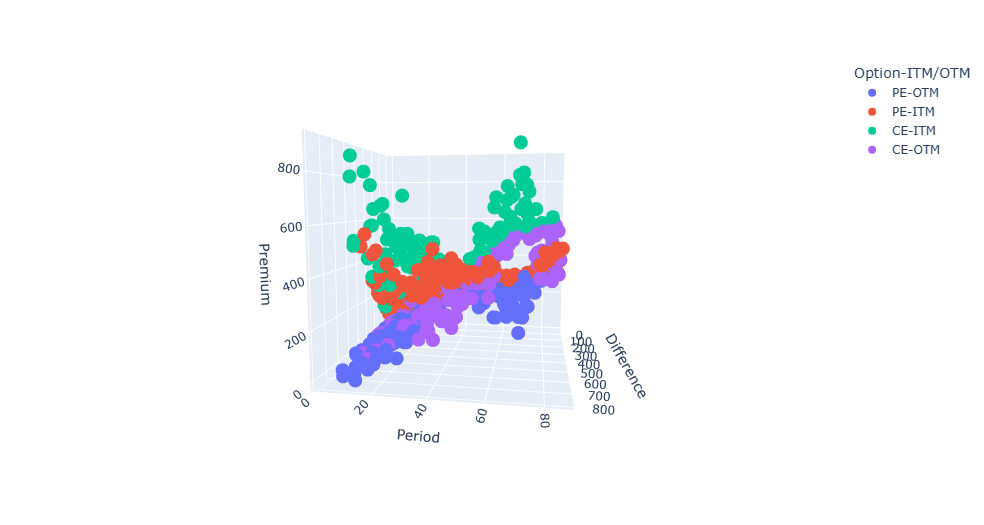

## Insight

- As the Period decreases, the premium also decreases, which is expected due to the reduction in time value. However, this trend may not be as pronounced for ITM options due to the influence of Intrinsic Value.

- When the difference and the period are the same, ITM Call Options (CE) are priced higher than both OTM Call Options and ITM Put Options (PE). Similarly, ITM PE is priced higher than OTM Put Options.

- In some cases, the premium of ITM PE can exceed that of OTM CE when there's a shorter period remaining until expiration.


In [59]:
final_data

,Option,Strike,Premium,Nifty,Period,Difference,ITM/OTM,Option-ITM/OTM
8,PE,19650,109.75,19742.35,21,92.35,OTM,PE-OTM
9,PE,19650,129.10,19674.25,20,24.25,OTM,PE-OTM
10,PE,19650,111.55,19674.55,17,24.55,OTM,PE-OTM
11,PE,19650,119.85,19664.70,16,14.70,OTM,PE-OTM
12,PE,19650,97.85,19716.45,15,66.45,OTM,PE-OTM
...,...,...,...,...,...,...,...,...
635,PE,19450,6.25,20103.10,7,653.10,OTM,PE-OTM
636,PE,19450,4.45,20192.35,6,742.35,OTM,PE-OTM
637,PE,19450,2.25,20133.30,3,683.30,OTM,PE-OTM
638,PE,19450,0.70,19901.40,1,451.40,OTM,PE-OTM


In [60]:
final_data

,Option,Strike,Premium,Nifty,Period,Difference,ITM/OTM,Option-ITM/OTM
8,PE,19650,109.75,19742.35,21,92.35,OTM,PE-OTM
9,PE,19650,129.10,19674.25,20,24.25,OTM,PE-OTM
10,PE,19650,111.55,19674.55,17,24.55,OTM,PE-OTM
11,PE,19650,119.85,19664.70,16,14.70,OTM,PE-OTM
12,PE,19650,97.85,19716.45,15,66.45,OTM,PE-OTM
...,...,...,...,...,...,...,...,...
635,PE,19450,6.25,20103.10,7,653.10,OTM,PE-OTM
636,PE,19450,4.45,20192.35,6,742.35,OTM,PE-OTM
637,PE,19450,2.25,20133.30,3,683.30,OTM,PE-OTM
638,PE,19450,0.70,19901.40,1,451.40,OTM,PE-OTM


In [61]:
final_data.columns

Index(['Option', 'Strike', 'Premium', 'Nifty', 'Period', 'Difference',
       'ITM/OTM', 'Option-ITM/OTM'],
      dtype='object')

In [62]:
l = ['Strike', 'Nifty', 'Period', 'Difference', 'Strike', 'Nifty', 'Period', 'Difference']

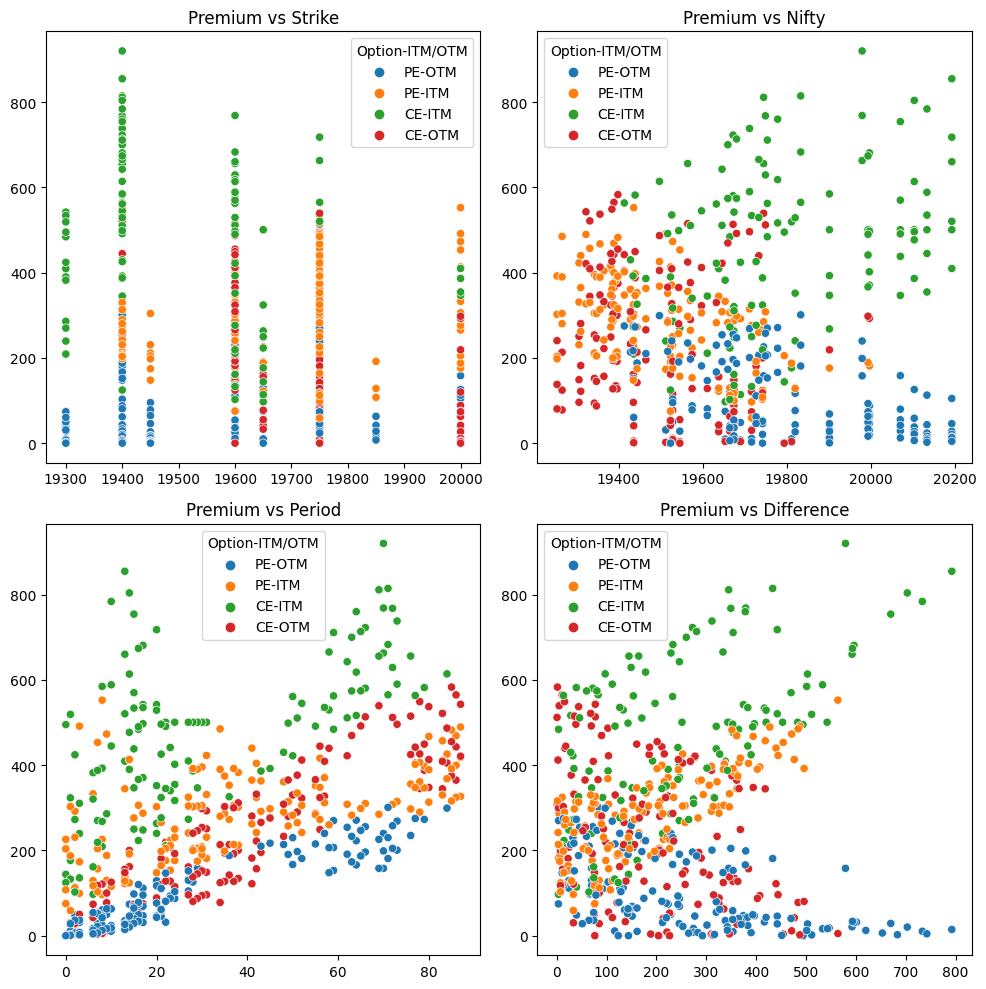

In [63]:
plt.figure(figsize=(10, 10))
i = 1

for col in final_data.columns:
    
    if col in ["Nifty", "Period", "Difference", "Strike"]:
        plt.subplot(2, 2, i)
        plt.title(f"Premium vs {col}")
        sns.scatterplot(data= final_data, x = col, y = "Premium", hue = "Option-ITM/OTM")
        plt.xlabel("")
        plt.ylabel("")
        i = i + 1
    
plt.tight_layout()
plt.show()

# Insights

1. **Regarding Nifty:** As the Nifty index rises, the premium of Call Options (CE) increases, while the premium of Put Options falls. This trend holds true for both In The Money (ITM) and Out of The Money (OTM) options.

2. **Regarding Period:** Similar to the conclusions drawn from the 3D plot, as the expiration date approaches, the premium of options decreases. This decrease reflects the diminishing Time Value of options. This effect is more pronounced in the case of OTM options, as ITM options also have Intrinsic Value (IV) in addition to Time Value.

3. **Regarding Difference between Strike and Nifty:** For ITM options, the premium rises with an increase in the difference between the Strike Price and Nifty. Conversely, for OTM options, the premium falls as the difference between the Strike Price and Nifty increases.


### Categorizing the Options into Four Types

1. **Slightly ITM/OTM:** 

2. **Near ITM/OTM:** 

3. **Moderately ITM/OTM:** 

4. **Deep ITM/OTM:** 



In [64]:
final_data["Difference"].describe()

count    564.000000
mean     223.417996
std      165.043148
min        0.750000
25%       80.600000
50%      206.000000
75%      339.312500
max      792.350000
Name: Difference, dtype: float64

In [65]:
from sklearn.preprocessing import KBinsDiscretizer

In [66]:
discretizer_quantile = KBinsDiscretizer(n_bins=4, strategy="quantile", encode = "ordinal")

In [67]:
final_data.index = range(0, len(final_data))

In [68]:
final_data

,Option,Strike,Premium,Nifty,Period,Difference,ITM/OTM,Option-ITM/OTM
0,PE,19650,109.75,19742.35,21,92.35,OTM,PE-OTM
1,PE,19650,129.10,19674.25,20,24.25,OTM,PE-OTM
2,PE,19650,111.55,19674.55,17,24.55,OTM,PE-OTM
3,PE,19650,119.85,19664.70,16,14.70,OTM,PE-OTM
4,PE,19650,97.85,19716.45,15,66.45,OTM,PE-OTM
...,...,...,...,...,...,...,...,...
559,PE,19450,6.25,20103.10,7,653.10,OTM,PE-OTM
560,PE,19450,4.45,20192.35,6,742.35,OTM,PE-OTM
561,PE,19450,2.25,20133.30,3,683.30,OTM,PE-OTM
562,PE,19450,0.70,19901.40,1,451.40,OTM,PE-OTM


In [69]:
final_data = pd.concat([pd.DataFrame(discretizer_quantile.fit_transform(final_data[["Difference"]]), columns=['Difference_Attribute']), final_data], axis=1   )

In [70]:
def fun(a):
    if a == 0:
        return "Slightly"
    if a == 1:
        return "Near"
    elif a == 2:
        return "Moderately"
    else:
        return "Deep"
final_data["Difference_Attribute"] = final_data["Difference_Attribute"].apply(fun)

In [71]:
final_data

,Difference_Attribute,Option,Strike,Premium,Nifty,Period,Difference,ITM/OTM,Option-ITM/OTM
0,Near,PE,19650,109.75,19742.35,21,92.35,OTM,PE-OTM
1,Slightly,PE,19650,129.10,19674.25,20,24.25,OTM,PE-OTM
2,Slightly,PE,19650,111.55,19674.55,17,24.55,OTM,PE-OTM
3,Slightly,PE,19650,119.85,19664.70,16,14.70,OTM,PE-OTM
4,Slightly,PE,19650,97.85,19716.45,15,66.45,OTM,PE-OTM
...,...,...,...,...,...,...,...,...,...
559,Deep,PE,19450,6.25,20103.10,7,653.10,OTM,PE-OTM
560,Deep,PE,19450,4.45,20192.35,6,742.35,OTM,PE-OTM
561,Deep,PE,19450,2.25,20133.30,3,683.30,OTM,PE-OTM
562,Deep,PE,19450,0.70,19901.40,1,451.40,OTM,PE-OTM


In [72]:
final_data["Option Attribute"] = final_data["Difference_Attribute"] + "-" + final_data["ITM/OTM"] + "-" +final_data["Option"]

In [75]:
final_data.to_csv("final_data.csv")

In [31]:
final_data = final_data[["Option Attribute", "Option", "ITM/OTM", "Premium", "Period"]]

In [32]:
final_data

,Option Attribute,Option,ITM/OTM,Premium,Period
0,Near-OTM-PE,PE,OTM,109.75,21
1,Slightly-OTM-PE,PE,OTM,129.10,20
2,Slightly-OTM-PE,PE,OTM,111.55,17
3,Slightly-OTM-PE,PE,OTM,119.85,16
4,Slightly-OTM-PE,PE,OTM,97.85,15
...,...,...,...,...,...
559,Deep-OTM-PE,PE,OTM,6.25,7
560,Deep-OTM-PE,PE,OTM,4.45,6
561,Deep-OTM-PE,PE,OTM,2.25,3
562,Deep-OTM-PE,PE,OTM,0.70,1


In [33]:
color = dict()
for a in final_data["Option Attribute"].unique():
    if "Deep" in a:
        color[a] = "Red"
    elif "Moderately" in a:
        color[a] = "Orange"
    elif "Near" in a:
        color[a] = "Blue"
    else:
        color[a] = "Green"

## Thus we divided the data into following categories of Options

In [34]:
final_data['Option Attribute'].value_counts()

Deep-OTM-PE          47
Deep-ITM-CE          45
Slightly-ITM-PE      44
Slightly-OTM-CE      43
Near-ITM-PE          40
Moderately-OTM-CE    40
Moderately-ITM-PE    37
Near-OTM-CE          36
Near-OTM-PE          34
Moderately-OTM-PE    33
Moderately-ITM-CE    32
Near-ITM-CE          31
Slightly-OTM-PE      28
Slightly-ITM-CE      25
Deep-ITM-PE          25
Deep-OTM-CE          24
Name: Option Attribute, dtype: int64

# Analysis (Cont.)

In [35]:
final_data = final_data[["Option Attribute", "Option", "ITM/OTM", "Premium", "Period"]]

In [36]:
final_data

,Option Attribute,Option,ITM/OTM,Premium,Period
0,Near-OTM-PE,PE,OTM,109.75,21
1,Slightly-OTM-PE,PE,OTM,129.10,20
2,Slightly-OTM-PE,PE,OTM,111.55,17
3,Slightly-OTM-PE,PE,OTM,119.85,16
4,Slightly-OTM-PE,PE,OTM,97.85,15
...,...,...,...,...,...
559,Deep-OTM-PE,PE,OTM,6.25,7
560,Deep-OTM-PE,PE,OTM,4.45,6
561,Deep-OTM-PE,PE,OTM,2.25,3
562,Deep-OTM-PE,PE,OTM,0.70,1


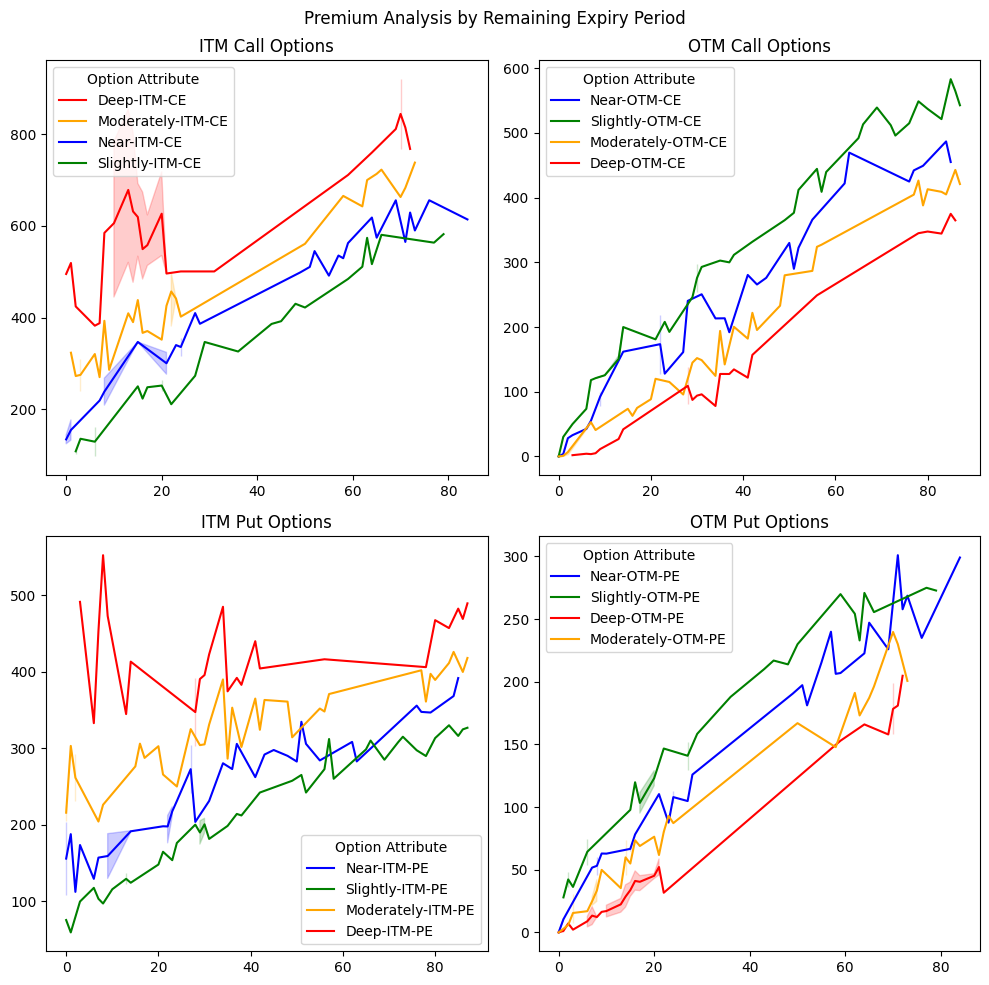

In [37]:
plt.figure(figsize=(10, 10))
plt.suptitle("Premium Analysis by Remaining Expiry Period")
plt.subplot(2, 2, 1)
plt.title("ITM Call Options")
sns.lineplot(data=final_data[(final_data["Option"] == "CE") & (final_data["ITM/OTM"] == "ITM")], x = "Period", y = "Premium", hue = "Option Attribute", palette=color)
plt.xlabel("")
plt.ylabel("")
plt.subplot(2, 2, 2)
plt.title("OTM Call Options")
sns.lineplot(data=final_data[(final_data["Option"] == "CE") & (final_data["ITM/OTM"] == "OTM")], x = "Period", y = "Premium", hue = "Option Attribute", palette=color)
plt.xlabel("")
plt.ylabel("")
plt.subplot(2, 2, 3)
plt.title("ITM Put Options")
sns.lineplot(data=final_data[(final_data["Option"] == "PE") & (final_data["ITM/OTM"] == "ITM")], x = "Period", y = "Premium", hue = "Option Attribute", palette=color)
plt.xlabel("")
plt.ylabel("")
plt.subplot(2, 2, 4)
plt.title("OTM Put Options")
sns.lineplot(data=final_data[(final_data["Option"] == "PE") & (final_data["ITM/OTM"] == "OTM")], x = "Period", y = "Premium", hue = "Option Attribute", palette=color)
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()

# Insights

1. **Period Effect:** As the remaining period for expiry decreases, the option premium experiences a decrease. This decrease is particularly noticeable in the case of Out of The Money (OTM) options, compared to In The Money (ITM) options.

2. **Pricing Difference:** The insights derived from the plot reveal significant pricing differences. Deep In The Money (ITM) options are priced higher than Slightly In The Money (ITM) options. Conversely, Deep Out of The Money (OTM) options are priced lower than Slightly Out of The Money (OTM) options.


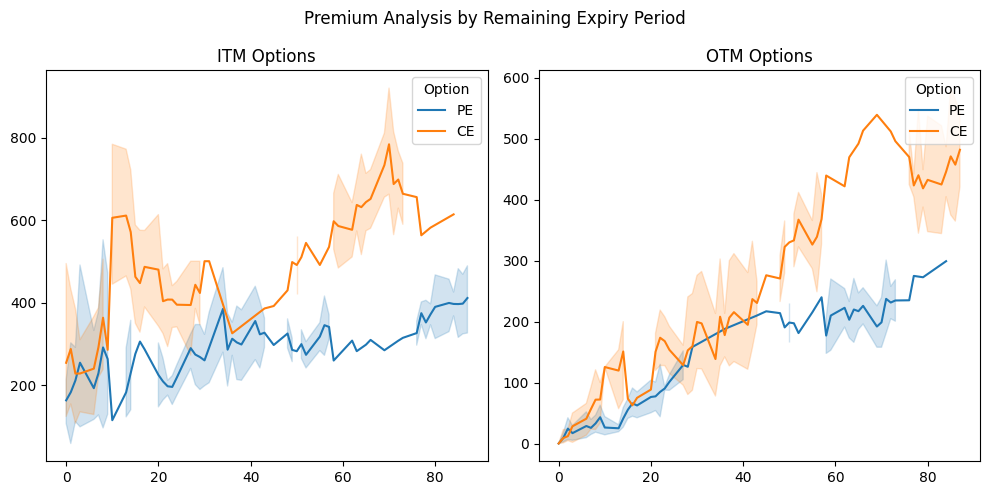

In [38]:
plt.figure(figsize=(10, 5))
plt.suptitle("Premium Analysis by Remaining Expiry Period")
plt.subplot(1, 2, 1)
plt.title("ITM Options")
sns.lineplot(data=final_data[(final_data["ITM/OTM"] == "ITM")], x = "Period", y = "Premium", hue = "Option")
plt.xlabel("")
plt.ylabel("")
plt.subplot(1, 2, 2)
plt.title("OTM Options")
sns.lineplot(data=final_data[(final_data["ITM/OTM"] == "OTM")], x = "Period", y = "Premium", hue = "Option")
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()

# Insights

1. **Call vs. Put Pricing:** On average, Call options are priced higher than Put options.

2. **Price Decline:** The decrease in price is more pronounced in Out of The Money (OTM) options.

3. **Intrinsic Value for ITM Options:** In the case of In The Money (ITM) options, Intrinsic Value remains, and it does not become zero on the expiry date.


<Axes: title={'center': 'Combined Call and Put Options Plot'}, xlabel='Period', ylabel='Premium'>

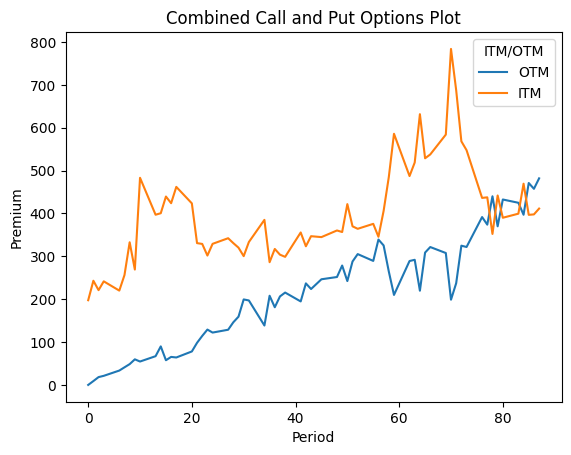

In [39]:
plt.title("Combined Call and Put Options Plot")
sns.lineplot(data=final_data, x = "Period", y = "Premium", hue = "ITM/OTM", ci = None)

In [40]:
pip install vanna

Note: you may need to restart the kernel to use updated packages.


In [41]:
import vanna as vn

In [42]:
api_key = vn.get_api_key('abhaygupta.xyz@gmail.com') # Put your email here


KeyboardInterrupt: Interrupted by user

In [ ]:
vn.set_api_key(api_key)

In [ ]:
vn.